# Questions and Answers

**1) What are the categorical differences in viewing patterns between Germans and Indians?**

According to the analysis of the behaviours of Indians and German people, there are a lot of differences. It could be found out by distribution and difference in absolute and percentage ratios. Also, it should take into account how many likes has the category.
- Indians and Germans show very similar behaviour in categories: `Entertainment`, `Music`, `Film & Animation`, `Howto & Style` and `Education`.
- The biggest difference is in the categories `People & Blogs` and `Sport`. These categories have big enough weight and can be classified as remarkable. These categories have 2.1 and 2.4 differences respectively.
- Other categories have fewer likes or in other words less weight. But some categories seem to be interesting. For example, `Gaming` is 4.1 times more popular in Germany. `Autos & Vehicles` in 11.5 times. `Pets & Animals` in 24 times.

------------------------------------------------------------------
 
**2) Ratios between views / likes / dislikes for different categories / countries. It seems to me that the Mexicans like all videos and the British are unhappy again. Is it easier for musicians to collect likes than for politicians?**

**Great Britain is the least involved. GB has the lowest ratios of comments, likes and dislikes to views. In other words, GB has the lowest response. However, Russia has the highest ratio. Whereas Mexico seems to me have the 2-nd place in involvedness rating. Mexicans really write a lot of comments and click a lot of likes but have a few dislikes/views ratio. I am not sure that the British are unhappy. It seems to me they are just less involved.**


**Likes distribution shows that**:
- `Other` category is the most popular for about a half countries.
- Category `Movies` is absent in trends in GB, JP, KR, MX and US.
- `Nonprofits & Activism` is in trending video in US only but no `Movie`, `Other` and `Trailers` categories. 
- `Trailers` is in France only.
- Japan has not `Shows`
- The most “musical” country is Japan, and the least is Great Britain.


**Dislikes distribution shows that**:
- `Other` category has the highest dislike ratio for CA, DE, FR, GB, MX, RU.
- Russia is very involved in `News & Politics` - the dislike ratio is the 2-nd highest category.
- US has the top dislike category `Nonprofit & activism` due to the reason that US only has the trending videos in this category.
- It seems that Russia is the country with the highest dislike ratio. RU has the most disliked among other countries in categories: `Autos & Vehicles`, `Comedy`, `Education`, `Entertainment`, `Film & Animation`, `Music`, `News & Politics`, `Other`, etc.

**Yes, it is easier for musicians to collect likes than for politicians. `Music` category has more likes than `News & Politics` for all countries except Great Britain where `Music` and `News & Politics` categories have a very close number of likes.**

------------------------------------------------------------------

**3) Сhannels that are popular in most countries. Ed Sheeran, hello.**

`Ed Sheeran` with 962 million trending views at 7-the position, whereas `ibighit` has 1.9 billion.

If popularity is measured by other metrics, the picture will be different. For example, `by likes` Ed Sheeran at the 6-th place.

The `Likes + dislike` measure provides similar results.

By `comment_count` he is at the 26-th place.

------------------------------------------------------------------

_**All answers from above are also provided by the code below.**_

## About Dataset

**Context**

YouTube (the world-famous video sharing website) maintains a list of the [top trending videos](https://www.youtube.com/feed/trending) on the platform. [According to Variety magazine](http://variety.com/2017/digital/news/youtube-2017-top-trending-videos-music-videos-1202631416/), “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously virile “Gangam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.

This dataset is a daily record of the top trending YouTube videos.

Note that this dataset is a structurally improved version of this [dataset](https://www.kaggle.com/datasnaek/youtube).

**Content**

This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for the US, GB, DE, CA, and FR regions (USA, Great Britain, Germany, Canada, and France, respectively), with up to 200 listed trending videos per day.

EDIT: Now includes data from RU, MX, KR, JP and IN regions (Russia, Mexico, South Korea, Japan and India respectively) over the same time period.

Each region’s data is in a separate file. Data includes the video title, channel title, publish time, tags, views, likes and dislikes, description, and comment count.

The data also includes a `category_id field`, which varies between regions. To retrieve the categories for a specific video, find it in the associated `JSON`. One such file is included for each of the five regions in the dataset.

For more information on specific columns in the dataset refer to the [column metadata](https://www.kaggle.com/datasnaek/youtube-new/data).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
import datetime
from glob import glob
import pycountry
import json
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings("ignore")

# Data load

In [2]:
countries=  ["GB", "MX",  "KR", "DE", "FR", "US", "IN", "RU", "JP", "CA" ]

for file in glob('..\..\data\youtube-new\*.csv'):
    print(file.split('\\')[4][:2], 
          " - ", 
          pycountry.countries.get(alpha_2=file.split('\\')[4][:2]).name)

CA  -  Canada
DE  -  Germany
FR  -  France
GB  -  United Kingdom
IN  -  India
JP  -  Japan
KR  -  Korea, Republic of
MX  -  Mexico
RU  -  Russian Federation
US  -  United States


In [3]:
# extracts category and category id from json string
def get_category_dict(json_string):
    category_dict = {}
    for items in range(len(json_string["items"])):
        category_dict[int(json_string["items"][items]["id"].strip())] = \
                                json_string["items"][items]["snippet"]["title"]
    return category_dict

# assigns category name to each category id in dataframe
def get_categories(cid_values,category_dict):
    category = []
    for cid in cid_values:
        if cid in category_dict:
            category.append(category_dict[cid])
        else:
            category.append("Other")
    return category

# modifies date from YY.DD.MM to YYYY-MM-DD
def transform_date(date_values):
    for item in range(len(date_values)):
        converted_time = time.strptime(date_values[item], '%y.%d.%m')
        date_values[item] = str(converted_time.tm_year) + \
        "-" + \
        str(converted_time.tm_mon) + \
        "-" + \
        str(converted_time.tm_mday)
    return date_values

In [4]:
df_ = pd.DataFrame()

for country in tqdm(["GB", "MX", "KR", "DE", "FR", "US", "IN", "RU", "JP", "CA"]):

    df = pd.read_csv(f"..\..\data\youtube-new\{country}videos.csv", encoding='latin')
    df_json = json.loads("".join(open(f'..\..\data\youtube-new\{country}_category_id.json',
                                      'r').readlines()))
    category_dict = get_category_dict(df_json)
    category = get_categories(df["category_id"].values, category_dict)
    country_code = [f'{country}'] * len(df)
    df["Category"] = category
    df["Country_code"] = country_code
    df["trending_date"] = transform_date(df["trending_date"].values)
    df_ = pd.concat([df_, df])

df_['trending_date'] = pd.to_datetime(df_['trending_date'], 
                                      format='%Y-%m-%d')
df_['publish_time'] = pd.to_datetime(df_['publish_time'], 
                                     format='%Y-%m-%dT%H:%M:%S.%f%z')
df_

  0%|          | 0/10 [00:00<?, ?it/s]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Category,Country_code
0,Jw1Y-zhQURU,2017-11-14,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10 07:38:29+00:00,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Howto & Style,GB
1,3s1rvMFUweQ,2017-11-14,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12 06:24:44+00:00,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,Entertainment,GB
2,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,GB
3,PUTEiSjKwJU,2017-11-14,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13 02:30:38+00:00,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,Sports,GB
4,rHwDegptbI4,2017-11-14,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13 01:45:13+00:00,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,News & Politics,GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,2018-06-14,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13 18:00:07+00:00,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,ð¨ NEW MERCH! http://amzn.to/annoyingorange ...,Entertainment,CA
40877,8HNuRNi8t70,2018-06-14,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13 19:01:18+00:00,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,âº Retrouvez vos programmes prÃ©fÃ©rÃ©s : htt...,Entertainment,CA
40878,GWlKEM3m2EE,2018-06-14,KINGDOM HEARTS III â SQUARE ENIX E3 SHOWCASE...,Kingdom Hearts,20,2018-06-11 17:30:53+00:00,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...,Gaming,CA
40879,lbMKLzQ4cNQ,2018-06-14,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13 04:00:05+00:00,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isnât talking so tough now. An...,News & Politics,CA


In [5]:
# count numbers of unique video for each country
video_id_unique = df_.value_counts(subset=['video_id', 'Country_code'])

# create DataFrame with counters, rename column, reset index
video_id_unique = pd.DataFrame(video_id_unique).rename(columns={0:'count'}).reset_index()

# merge original DataFrame with counters
df1 = pd.merge(df_, video_id_unique, on=['video_id', 'Country_code'], how='left')

# get dataframe with max trending date as last unique row
max_df = df1.groupby(['video_id', 'Country_code'])['trending_date'].transform(max)

# get rif of useless raws
df = df1.loc[df1['trending_date'] == max_df]
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Category,Country_code,count
4,rHwDegptbI4,2017-11-14,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13 01:45:13+00:00,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,News & Politics,GB,1
5,AumaWl0TNBo,2017-11-14,How My Relationship Started!,PointlessBlogVlogs,24,2017-11-11 17:00:00+00:00,"pointlessblog|""pointlessblogtv""|""pointlessblog...",1182775,52708,1431,2333,https://i.ytimg.com/vi/AumaWl0TNBo/default.jpg,False,False,False,âº HOW MY RELATIONSHIP STARTED!\nâº PB Merch...,Entertainment,GB,1
7,-N5eucPMTTc,2017-11-14,CHRISTMAS HAS GONE TO MY HEAD,MoreZoella,22,2017-11-10 19:19:43+00:00,"zoe sugg|""zoella""|""zoe""|""vlog""|""vlogging""|""vlo...",1164201,57309,749,624,https://i.ytimg.com/vi/-N5eucPMTTc/default.jpg,False,False,False,CHRISTMAS HAS GONE TO MY HEAD\nPrevious Vlog: ...,People & Blogs,GB,1
22,fiusxyygqGk,2017-11-14,Marshmello - You & Me (Official Music Video),marshmello,10,2017-11-10 15:00:03+00:00,"selena gomez wolves|""alone marshmello""|""marshm...",3407008,207262,3167,13279,https://i.ytimg.com/vi/fiusxyygqGk/default.jpg,False,False,False,PURCHASE YOU & ME HERE â¶ https://smarturl.it...,Music,GB,1
90,sLJdBmAeB_U,2017-11-14,COME SHOPPING WITH ME AND TRY ON NEW CLOTHING ...,Inthefrow,26,2017-11-07 19:00:50+00:00,"Inthefrow|""In the frow""|""COME SHOPPING WITH ME...",87772,2617,86,192,https://i.ytimg.com/vi/sLJdBmAeB_U/default.jpg,False,False,False,COME SHOPPING WITH ME AND TRYING ON NEW CLOTHI...,Howto & Style,GB,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375937,sGolxsMSGfQ,2018-06-14,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13 18:00:07+00:00,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,ð¨ NEW MERCH! http://amzn.to/annoyingorange ...,Entertainment,CA,1
375938,8HNuRNi8t70,2018-06-14,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13 19:01:18+00:00,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,âº Retrouvez vos programmes prÃ©fÃ©rÃ©s : htt...,Entertainment,CA,1
375939,GWlKEM3m2EE,2018-06-14,KINGDOM HEARTS III â SQUARE ENIX E3 SHOWCASE...,Kingdom Hearts,20,2018-06-11 17:30:53+00:00,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...,Gaming,CA,3
375940,lbMKLzQ4cNQ,2018-06-14,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13 04:00:05+00:00,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isnât talking so tough now. An...,News & Politics,CA,1


In [6]:
df[df['video_id'] == '3s1rvMFUweQ']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Category,Country_code,count
665,3s1rvMFUweQ,2017-11-17,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12 06:24:44+00:00,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1776127,35741,3214,3585,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,Entertainment,GB,3
39069,3s1rvMFUweQ,2017-11-14,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12 06:24:44+00:00,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25562,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,Entertainment,MX,1


# Short data overview

In [7]:
round(df.describe().drop(["category_id"],axis=1), 1)

,views,likes,dislikes,comment_count,count
count,213686.0,213686.0,213686.0,213686.0,213686.0
mean,528591.5,16149.6,970.1,2020.2,1.9
std,3248750.2,90509.0,12630.7,14947.4,4.5
min,153.0,0.0,0.0,0.0,1.0
25%,25676.2,365.0,22.0,58.0,1.0
50%,92602.0,1680.0,93.0,265.0,1.0
75%,321906.5,7214.8,368.0,1015.0,2.0
max,424538912.0,5613827.0,1944971.0,1626501.0,560.0


In [8]:
country_views = pd.DataFrame(df.groupby('Country_code')['views'].sum())
country_views

,views
Country_code,
CA,20410495101
DE,14237965000
FR,10575960316
GB,15823521156
IN,12395787084
JP,4388602239
KR,6110929964
MX,9400809248
RU,7127438430


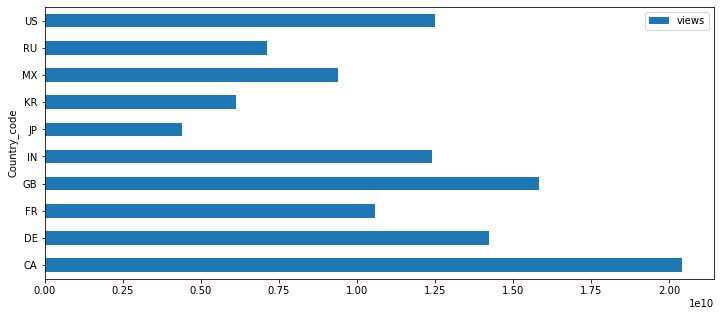

In [9]:
country_views.plot(kind='barh', figsize=(12,5));

# 1) Categorical differences in viewing patterns between Germans and Indians

## All countries

In [10]:
# Country / Category views
cc_views = pd.DataFrame(df.groupby(['Country_code', 'Category'])['views'].sum())
cc_views = cc_views.reset_index()
cc_views

,Country_code,Category,views
0,CA,Autos & Vehicles,119562221
1,CA,Comedy,1700112283
2,CA,Education,271530103
3,CA,Entertainment,6038865759
4,CA,Film & Animation,1134592939
...,...,...,...
162,US,Pets & Animals,104204643
163,US,Science & Technology,428430317
164,US,Shows,3049600
165,US,Sports,639389230


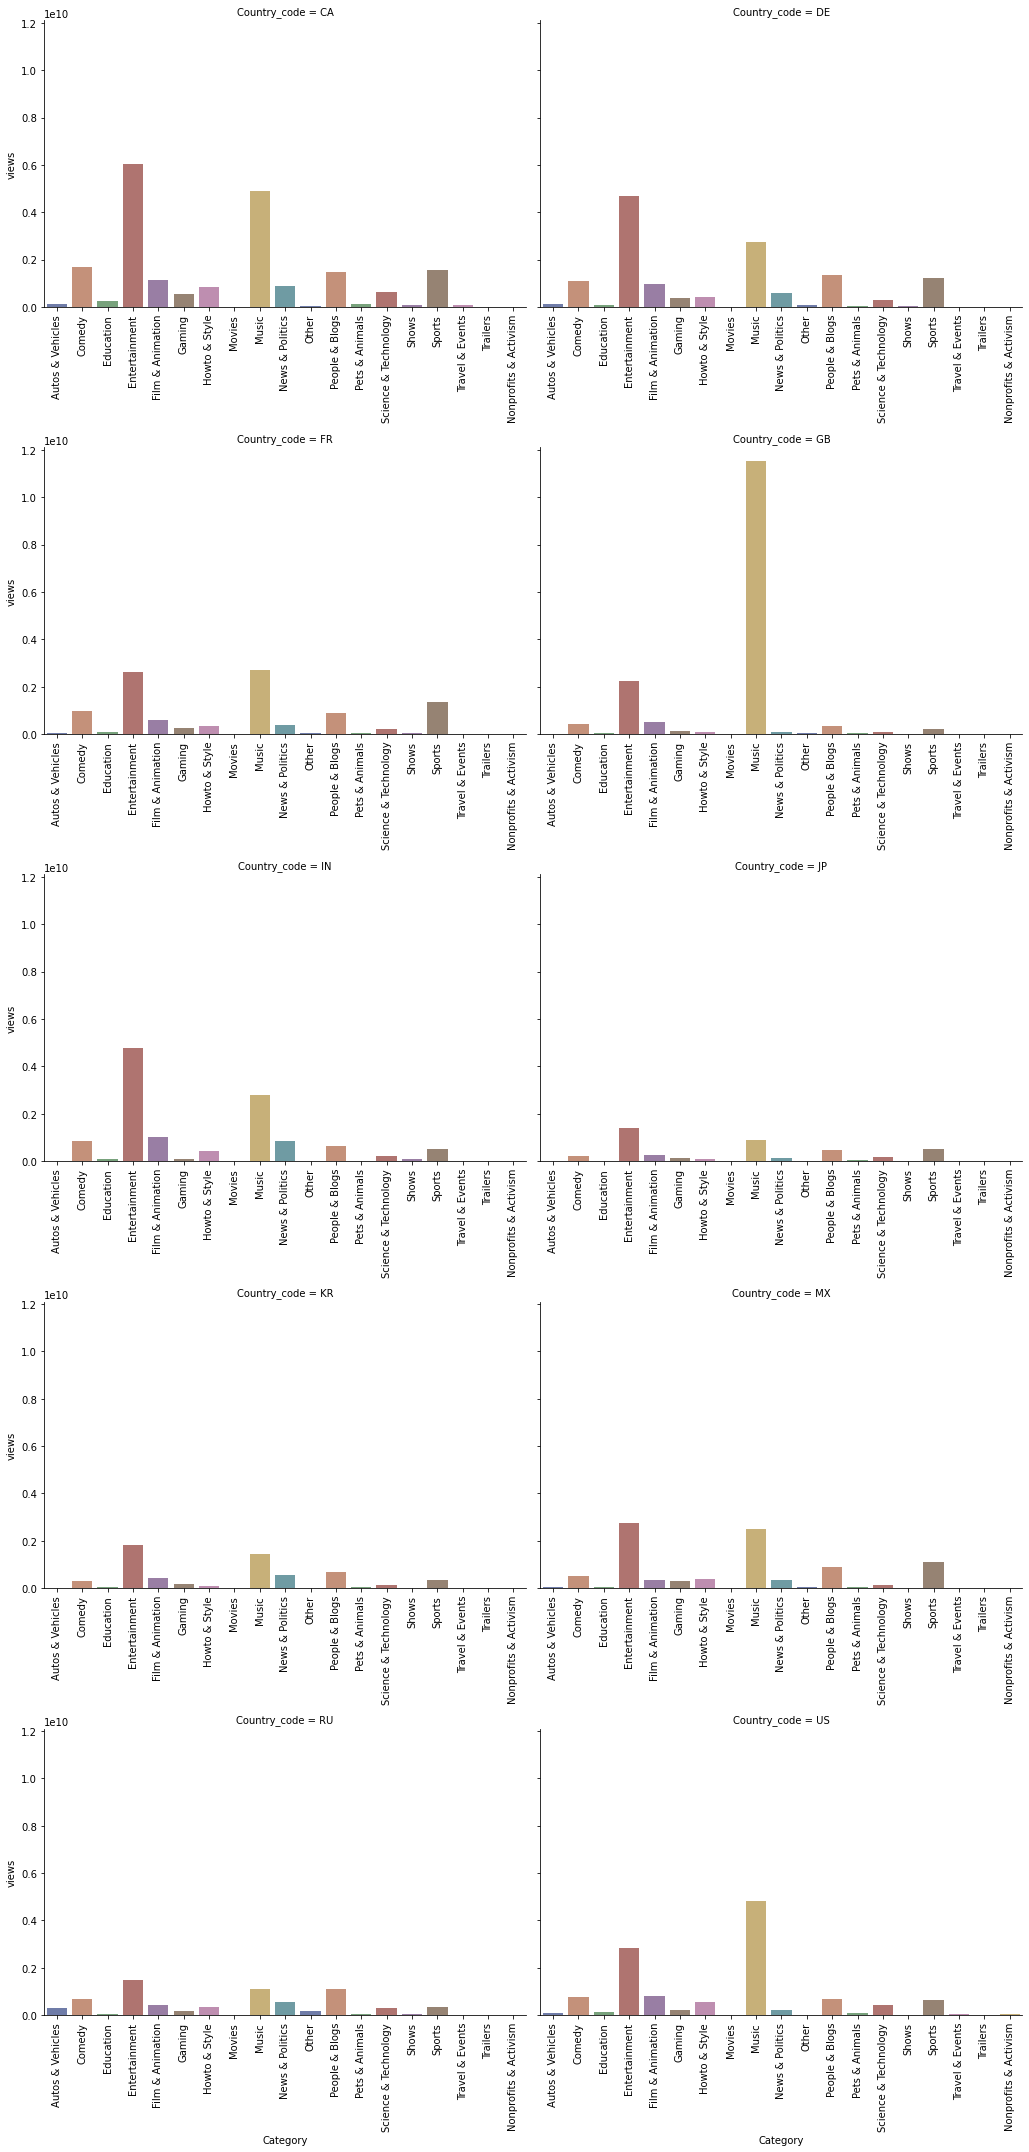

In [11]:
g = sns.catplot(data=cc_views, 
                x='Category', y='views', col='Country_code', kind='bar',
                palette='dark', alpha=.6, col_wrap=2, height=6, aspect=1.2,
                )
g.set_xticklabels(rotation=90)

# axis titles for every sub plot
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
# shrink sub plots
g.fig.tight_layout();

## Germany vs India

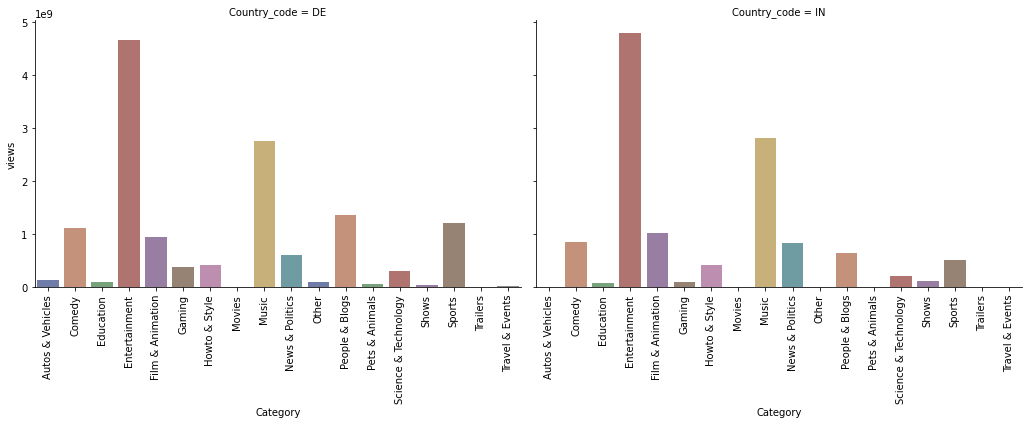

In [12]:
g = sns.catplot(data=cc_views[cc_views['Country_code'].isin(['DE', 'IN'])], 
                x='Category', y='views', col='Country_code', kind='bar',
                palette='dark', alpha=.6, col_wrap=2, height=6, aspect=1.2,
                )
g.set_xticklabels(rotation=90)

# axis titles for every sub plot
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
# shrink sub plots
g.fig.tight_layout();

In [13]:
categories = df["Category"].unique()
categories

array(['News & Politics', 'Entertainment', 'People & Blogs', 'Music',
       'Howto & Style', 'Sports', 'Comedy', 'Film & Animation',
       'Autos & Vehicles', 'Gaming', 'Science & Technology', 'Education',
       'Pets & Animals', 'Travel & Events', 'Other', 'Shows', 'Trailers',
       'Movies', 'Nonprofits & Activism'], dtype=object)

In [14]:
cc_views = pd.DataFrame(df.groupby(['Country_code', 'Category'])['views'].sum())
cc_views = cc_views.reset_index().set_index('Category')
de_views = cc_views[cc_views['Country_code'].isin(['DE'])].to_dict()
de_views = de_views.get('views')
de_views

{'Autos & Vehicles': 130104541,
 'Comedy': 1111204915,
 'Education': 95320377,
 'Entertainment': 4671192444,
 'Film & Animation': 951467312,
 'Gaming': 380775835,
 'Howto & Style': 414072440,
 'Movies': 2289027,
 'Music': 2765219052,
 'News & Politics': 600373975,
 'Other': 95905760,
 'People & Blogs': 1366450567,
 'Pets & Animals': 60098151,
 'Science & Technology': 309195969,
 'Shows': 49046271,
 'Sports': 1218793365,
 'Trailers': 8804,
 'Travel & Events': 16446195}

In [15]:
cc_views = pd.DataFrame(df.groupby(['Country_code', 'Category'])['views'].sum())
cc_views = cc_views.reset_index().set_index('Category')
in_views = cc_views[cc_views['Country_code'].isin(['IN'])].to_dict()
in_views = in_views.get('views')
in_views

{'Autos & Vehicles': 11331023,
 'Comedy': 858370652,
 'Education': 78208893,
 'Entertainment': 4797308039,
 'Film & Animation': 1016107456,
 'Gaming': 92678491,
 'Howto & Style': 415189473,
 'Movies': 7724380,
 'Music': 2809142589,
 'News & Politics': 836119354,
 'Other': 3929208,
 'People & Blogs': 638239335,
 'Pets & Animals': 2490776,
 'Science & Technology': 214608610,
 'Shows': 109246620,
 'Sports': 504320554,
 'Travel & Events': 771631}

**Difference in absolute numbers.**

In [16]:
categories_count_dict_diff = {}
for category in categories:
    if de_views.get(category) and in_views.get(category):
        categories_count_dict_diff[category] = de_views[category] - in_views[category]
    elif de_views.get(category) and not in_views.get(category):
        categories_count_dict_diff[category] = de_views[category]
    elif not de_views.get(category) and in_views.get(category):
        categories_count_dict_diff[category] = - in_views[category]
    else:
        categories_count_dict_diff[category] = 0
        

categories_count_dict_diff = dict(sorted(categories_count_dict_diff.items(),
                                         key=lambda item: abs(item[1])))
categories_count_dict_diff

{'Nonprofits & Activism': 0,
 'Trailers': 8804,
 'Howto & Style': -1117033,
 'Movies': -5435353,
 'Travel & Events': 15674564,
 'Education': 17111484,
 'Music': -43923537,
 'Pets & Animals': 57607375,
 'Shows': -60200349,
 'Film & Animation': -64640144,
 'Other': 91976552,
 'Science & Technology': 94587359,
 'Autos & Vehicles': 118773518,
 'Entertainment': -126115595,
 'News & Politics': -235745379,
 'Comedy': 252834263,
 'Gaming': 288097344,
 'Sports': 714472811,
 'People & Blogs': 728211232}

**Difference in percents.**

In [17]:
categories_count_dict_diff_perc = {}
for category in categories:
    if de_views.get(category) and in_views.get(category):
        categories_count_dict_diff_perc[category] = round((de_views[category] 
                    - in_views[category]) / de_views[category], 2)
    elif de_views.get(category) and not in_views.get(category):
        categories_count_dict_diff_perc[category] = 1
    elif not de_views.get(category) and in_views.get(category):
        categories_count_dict_diff_perc[category] = - 1
    else:
        categories_count_dict_diff_perc[category] = 0

categories_count_dict_diff_perc = dict(sorted(categories_count_dict_diff_perc.items(), 
                                              key=lambda item: abs(item[1])))
categories_count_dict_diff_perc

{'Howto & Style': -0.0,
 'Nonprofits & Activism': 0,
 'Music': -0.02,
 'Entertainment': -0.03,
 'Film & Animation': -0.07,
 'Education': 0.18,
 'Comedy': 0.23,
 'Science & Technology': 0.31,
 'News & Politics': -0.39,
 'People & Blogs': 0.53,
 'Sports': 0.59,
 'Gaming': 0.76,
 'Autos & Vehicles': 0.91,
 'Travel & Events': 0.95,
 'Pets & Animals': 0.96,
 'Other': 0.96,
 'Trailers': 1,
 'Shows': -1.23,
 'Movies': -2.37}

**Plots of the difference between Germany and India**.

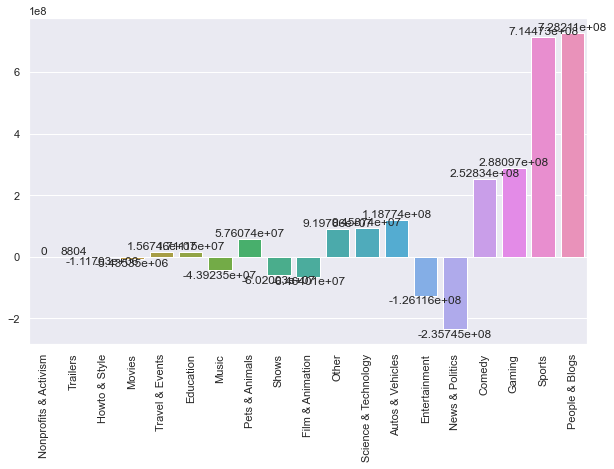

In [18]:
sns.set(rc={'figure.figsize':(10, 6)})
ax = sns.barplot(x=list(categories_count_dict_diff.keys()), 
            y=list(categories_count_dict_diff.values())
           );
plt.xticks(rotation=90);
for i in ax.containers:
    ax.bar_label(i,)

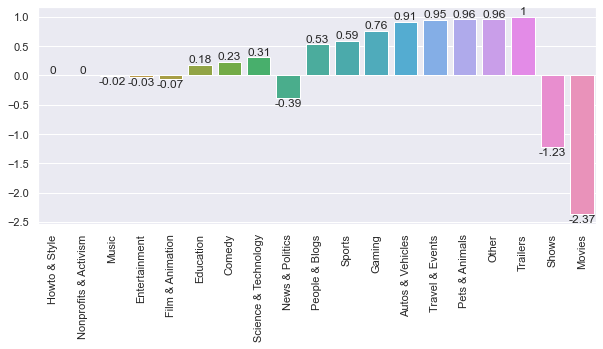

In [19]:
sns.set(rc={'figure.figsize':(10, 4)})
ax = sns.barplot(x=list(categories_count_dict_diff_perc.keys()), 
            y=list(categories_count_dict_diff_perc.values())
           );
plt.xticks(rotation=90);
for i in ax.containers:
    ax.bar_label(i,)

In [20]:
df_diff = pd.DataFrame(in_views, index=[0])
df_diff = pd.concat([df_diff, pd.DataFrame(de_views, index=[1])])
df_diff = df_diff.T.rename({0: 'IN', 1: 'DE'}, axis='columns')
df_diff = df_diff.reset_index().rename({'index': 'Category'}, axis='columns')
df_diff.sort_values(by='IN', inplace=True)
df_diff['ratio IN / DE'] = df_diff['IN'] / df_diff['DE']
df_diff['ratio DE / IN'] = df_diff['DE'] / df_diff['IN']

df_diff

,Category,IN,DE,ratio IN / DE,ratio DE / IN
16,Travel & Events,7.716310e+05,1.644620e+07,0.046919,21.313549
12,Pets & Animals,2.490776e+06,6.009815e+07,0.041445,24.128284
10,Other,3.929208e+06,9.590576e+07,0.040969,24.408420
7,Movies,7.724380e+06,2.289027e+06,3.374526,0.296338
0,Autos & Vehicles,1.133102e+07,1.301045e+08,0.087092,11.482153
2,Education,7.820889e+07,9.532038e+07,0.820485,1.218792
5,Gaming,9.267849e+07,3.807758e+08,0.243394,4.108567
14,Shows,1.092466e+08,4.904627e+07,2.227419,0.448950
13,Science & Technology,2.146086e+08,3.091960e+08,0.694086,1.440744
6,Howto & Style,4.151895e+08,4.140724e+08,1.002698,0.997310


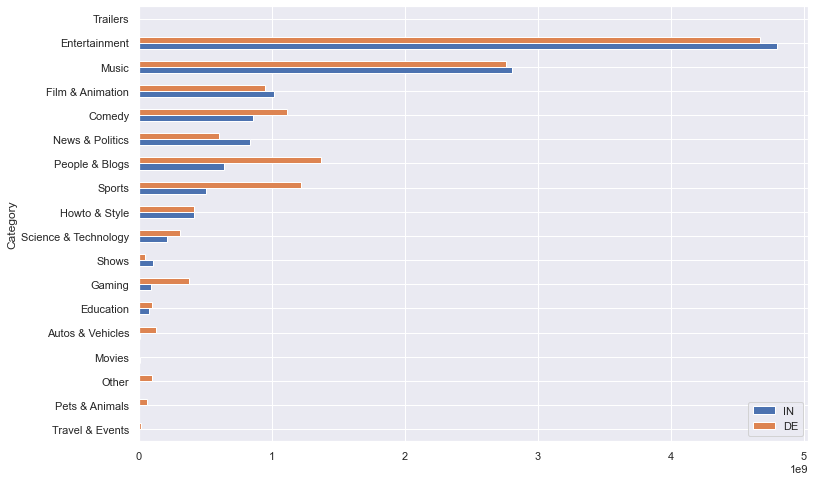

In [21]:
df_diff[['Category', 'IN', 'DE']].plot(kind='barh', x='Category', figsize=(12,8));

**Answer**:

According to the analysis of the behaviours of Indians and German people, there are a lot of differences. It could be found out by distribution and difference in absolute and percentage ratios. Also, it should take into account how many likes has the category.
- Indians and Germans show very similar behaviour in categories: `Entertainment`, `Music`, `Film & Animation`, `Howto & Style` and `Education`.
- The biggest difference is in the categories `People & Blogs` and `Sport`. These categories have big enough weight and can be classified as remarkable. These categories have 2.1 and 2.4 differences respectively.
- Other categories have fewer likes or in other words less weight. But some categories seem to be interesting. For example, `Gaming` is 4.1 times more popular in Germany. `Autos & Vehicles` in 11.5 times. `Pets & Animals` in 24 times.

# 2) Ratios between views / likes / dislikes for different categories / countries. It seems to me that the Mexicans like all videos and the British are unhappy again. Is it easier for musicians to collect likes than for politicians?

### Aggregation by countries

In [22]:
df_agg = df.groupby(by='Country_code').sum()
# scaling
df_agg['comment / views ratio'] = df_agg['comment_count'] / df_agg['views']
df_agg['likes / views ratio'] = df_agg['likes'] / df_agg['views']
df_agg['dislikes / views ratio'] = df_agg['dislikes'] / df_agg['views']
df_agg = df_agg.drop(['category_id', 'video_error_or_removed'], axis=1)
df_agg.style.background_gradient(cmap='Blues')

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,count,comment / views ratio,likes / views ratio,dislikes / views ratio
Country_code,,,,,,,,,,
CA,20410495101,630739201,31215329,82422100,359,199,40881,0.004038,0.030903,0.001529
DE,14237965000,461208007,30074238,60418811,764,531,40840,0.004244,0.032393,0.002112
FR,10575960316,369305768,18006523,40438978,728,572,40724,0.003824,0.034919,0.001703
GB,15823521156,328127331,19308023,32919111,51,14,39209,0.002080,0.020737,0.001220
IN,12395787084,257534302,17237999,26318624,614,427,42602,0.002123,0.020776,0.001391
JP,4388602239,138166825,6095832,20205824,1166,1188,31735,0.004604,0.031483,0.001389
KR,6110929964,154626804,6893399,24738858,266,755,37093,0.004048,0.025303,0.001128
MX,9400809248,416121545,18457132,53347707,379,551,42104,0.005675,0.044264,0.001963
RU,7127438430,341692783,40522241,49868726,942,901,41398,0.006997,0.047940,0.005685


**Answer**

Great Britain is the least involved. GB has the lowest ratios of comments, likes and dislikes to views. In other words, GB has the lowest response. However, Russia has the highest ratio. Whereas Mexico seems to me have the 2-nd place in involvedness rating. Mexicans really write a lot of comments and click a lot of likes but have a few dislikes/views ratio. I am not sure that the British are unhappy. It seems to me they are just less involved.

### Aggregation by category and country

In [23]:
df_agg_cc = df.groupby(by=['Category', 'Country_code',]).sum()
# scaling
df_agg_cc['comment / views ratio'] = df_agg_cc['comment_count'] / df_agg_cc['views']
df_agg_cc['likes / views ratio'] = df_agg_cc['likes'] / df_agg_cc['views']
df_agg_cc['dislikes / views ratio'] = df_agg_cc['dislikes'] / df_agg_cc['views']
df_agg_cc = df_agg_cc.drop(['category_id', 'comments_disabled', 'ratings_disabled',
                            'video_error_or_removed'], axis=1)
df_agg_cc.head(12)

views     likes  dislikes  comment_count  \
Category         Country_code                                                  
Autos & Vehicles CA             119562221   3280828    113746         660392   
                 DE             130104541   4231532    133103         470867   
                 FR              36047867   1165235     42325         151952   
                 GB              20406847    349318     24374          42966   
                 IN              11331023    189163      9158          26945   
                 JP              16781121    264414     14651          35800   
                 KR               6801392     79444      6563          20868   
                 MX              30558474   1694361     45873         208827   
                 RU             282523733  14909171   1068978        1626682   
                 US             102913586    730306     46397         123347   
Comedy           CA            1700112283  85209714   2420559        8446650   
                 DE            1111204915  46753022   1680685        5989083   

                               count  comment / views ratio  \
Category         Country_code                                 
Autos & Vehicles CA              353               0.005523   
                 DE              871               0.003619   
                 FR              673               0.004215   
                 GB              144               0.002105   
                 IN               75               0.002378   
                 JP              365               0.002133   
                 KR              117               0.003068   
                 MX              248               0.006834   
                 RU             1568               0.005758   
                 US              385               0.001199   
Comedy           CA             3773               0.004968   
                 DE             2528               0.005390   

                               likes / views ratio  dislikes / views ratio  
Category         Country_code                                               
Autos & Vehicles CA                       0.027440                0.000951  
                 DE                       0.032524                0.001023  
                 FR                       0.032325                0.001174  
                 GB                       0.017118                0.001194  
                 IN                       0.016694                0.000808  
                 JP                       0.015757                0.000873  
                 KR                       0.011681                0.000965  
                 MX                       0.055447                0.001501  
                 RU                       0.052771                0.003784  
                 US                       0.007096                0.000451  
Comedy           CA                       0.050120                0.001424  
                 DE                       0.042074                0.001512

In [24]:
df_agg_cc = df.groupby(by=['Category', 'Country_code',]).sum()
# scaling
df_agg_cc['comment / views ratio'] = df_agg_cc['comment_count'] / df_agg_cc['views']
df_agg_cc['likes / views ratio'] = df_agg_cc['likes'] / df_agg_cc['views']
df_agg_cc['dislikes / views ratio'] = df_agg_cc['dislikes'] / df_agg_cc['views']
df_agg_cc = df_agg_cc.drop(['category_id', 'comments_disabled', 'ratings_disabled',
                            'video_error_or_removed'], axis=1)
df_agg_cc.head(12)

views     likes  dislikes  comment_count  \
Category         Country_code                                                  
Autos & Vehicles CA             119562221   3280828    113746         660392   
                 DE             130104541   4231532    133103         470867   
                 FR              36047867   1165235     42325         151952   
                 GB              20406847    349318     24374          42966   
                 IN              11331023    189163      9158          26945   
                 JP              16781121    264414     14651          35800   
                 KR               6801392     79444      6563          20868   
                 MX              30558474   1694361     45873         208827   
                 RU             282523733  14909171   1068978        1626682   
                 US             102913586    730306     46397         123347   
Comedy           CA            1700112283  85209714   2420559        8446650   
                 DE            1111204915  46753022   1680685        5989083   

                               count  comment / views ratio  \
Category         Country_code                                 
Autos & Vehicles CA              353               0.005523   
                 DE              871               0.003619   
                 FR              673               0.004215   
                 GB              144               0.002105   
                 IN               75               0.002378   
                 JP              365               0.002133   
                 KR              117               0.003068   
                 MX              248               0.006834   
                 RU             1568               0.005758   
                 US              385               0.001199   
Comedy           CA             3773               0.004968   
                 DE             2528               0.005390   

                               likes / views ratio  dislikes / views ratio  
Category         Country_code                                               
Autos & Vehicles CA                       0.027440                0.000951  
                 DE                       0.032524                0.001023  
                 FR                       0.032325                0.001174  
                 GB                       0.017118                0.001194  
                 IN                       0.016694                0.000808  
                 JP                       0.015757                0.000873  
                 KR                       0.011681                0.000965  
                 MX                       0.055447                0.001501  
                 RU                       0.052771                0.003784  
                 US                       0.007096                0.000451  
Comedy           CA                       0.050120                0.001424  
                 DE                       0.042074                0.001512

#### Likes distribution

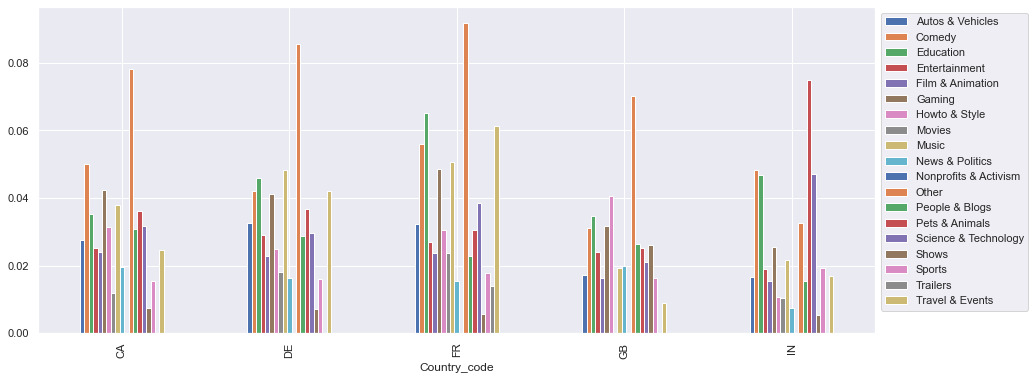

In [25]:
ax = df_agg_cc['likes / views ratio'].unstack(level=0)[:5].plot(kind='bar', 
                                                    subplots=False, figsize=(15,6))
ax.legend(bbox_to_anchor=(1.0, 1.0));

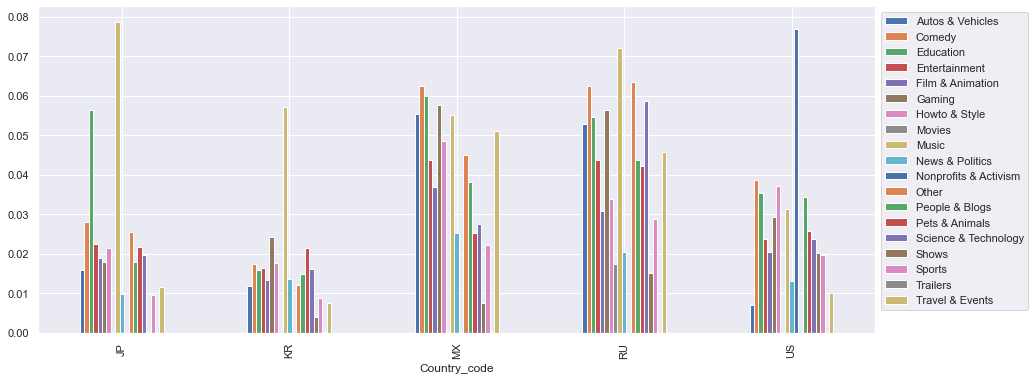

In [26]:
ax = df_agg_cc['likes / views ratio'].unstack(level=0)[5:].plot(kind='bar', 
                                                    subplots=False, figsize=(15,6))
ax.legend(bbox_to_anchor=(1.0, 1.0));

**Likes distribution shows that**:
- `Other` category is the most popular for about a half countries.
- Category `Movies` is absent in trends in GB, JP, KR, MX and US.
- `Nonprofits & Activism` is in trending video in US only but no `Movie`, `Other` and `Trailers` categories. 
- `Trailers` is in France only.
- Japan has not `Shows`
- The most “musical” country is Japan, and the least is Great Britain.

#### Dislikes distribution

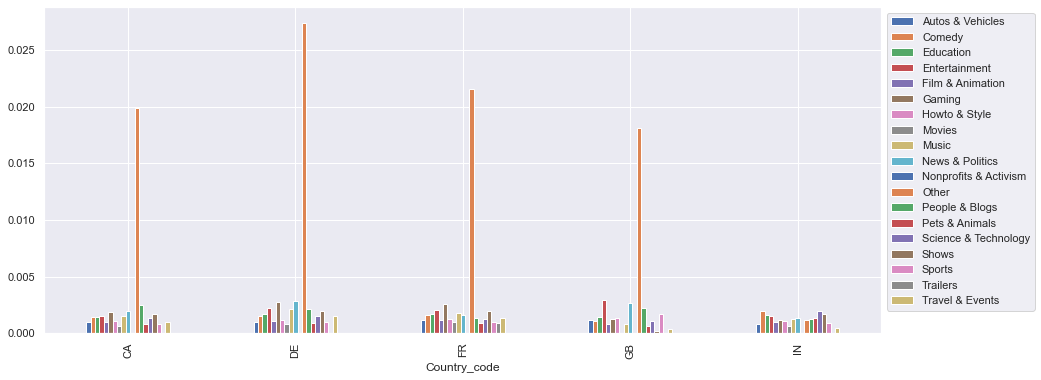

In [27]:
ax = df_agg_cc['dislikes / views ratio'].unstack(level=0)[:5].plot(kind='bar', 
                                                        subplots=False, figsize=(15,6))
ax.legend(bbox_to_anchor=(1.0, 1.0));

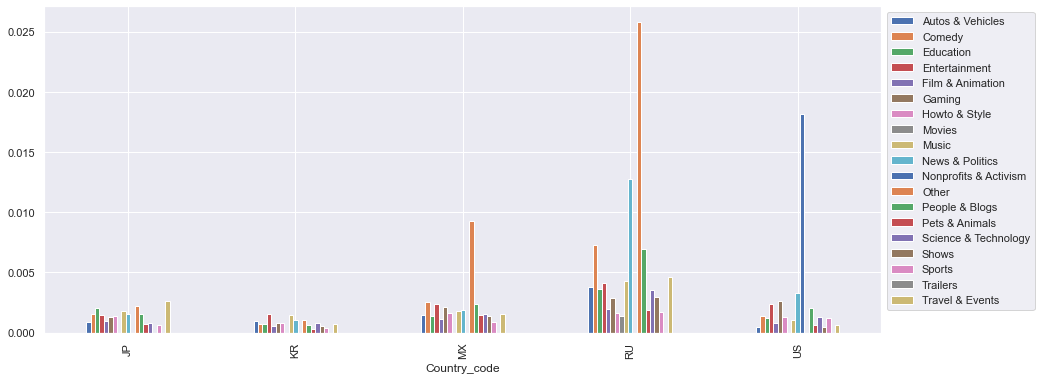

In [28]:
ax = df_agg_cc['dislikes / views ratio'].unstack(level=0)[5:].plot(kind='bar', 
                                                        subplots=False, figsize=(15,6))
ax.legend(bbox_to_anchor=(1.0, 1.0));

### Aggregation by country and category

In [29]:
df_agg_cc = df.groupby(by=['Country_code', 'Category']).sum()
# scaling
df_agg_cc['comment / views ratio'] = df_agg_cc['comment_count'] / df_agg_cc['views']
df_agg_cc['likes / views ratio'] = df_agg_cc['likes'] / df_agg_cc['views']
df_agg_cc['dislikes / views ratio'] = df_agg_cc['dislikes'] / df_agg_cc['views']
df_agg_cc = df_agg_cc.drop(['category_id', 'comments_disabled', 'ratings_disabled',
                            'video_error_or_removed'], axis=1)
df_agg_cc.head(20)

views      likes  dislikes  \
Country_code Category                                                
CA           Autos & Vehicles       119562221    3280828    113746   
             Comedy                1700112283   85209714   2420559   
             Education              271530103    9612006    384975   
             Entertainment         6038865759  152755591   9110085   
             Film & Animation      1134592939   27284332   1169308   
             Gaming                 554124261   23470219   1015760   
             Howto & Style          847346441   26666423    886276   
             Movies                   5661965      67232      3784   
             Music                 4893610284  185373454   7465043   
             News & Politics        900896609   17571029   1765626   
             Other                   42138682    3294846    839446   
             People & Blogs        1475905341   45663638   3664402   
             Pets & Animals         117692350    4262121     98866   
             Science & Technology   616550681   19639675    809295   
             Shows                   64140311     480041    108268   
             Sports                1547499304   24120915   1283625   
             Travel & Events         80265567    1987137     76265   
DE           Autos & Vehicles       130104541    4231532    133103   
             Comedy                1111204915   46753022   1680685   
             Education               95320377    4391928    160353   

                                   comment_count  count  \
Country_code Category                                     
CA           Autos & Vehicles             660392    353   
             Comedy                      8446650   3773   
             Education                   1396637    991   
             Entertainment              21669765  13448   
             Film & Animation            3524208   2060   
             Gaming                      4150156   1343   
             Howto & Style               4581432   2007   
             Movies                         3851      6   
             Music                      16726764   3736   
             News & Politics             5235130   4158   
             Other                        947673     73   
             People & Blogs              7178112   4099   
             Pets & Animals               830835    370   
             Science & Technology        3139831   1155   
             Shows                         66245    130   
             Sports                      3548135   2787   
             Travel & Events              316284    392   
DE           Autos & Vehicles             470867    871   
             Comedy                      5989083   2528   
             Education                    555756    844   

                                   comment / views ratio  likes / views ratio  \
Country_code Category                                                           
CA           Autos & Vehicles                   0.005523             0.027440   
             Comedy                             0.004968             0.050120   
             Education                          0.005144             0.035399   
             Entertainment                      0.003588             0.025295   
             Film & Animation                   0.003106             0.024048   
             Gaming                             0.007490             0.042356   
             Howto & Style                      0.005407             0.031471   
             Movies                             0.000680             0.011874   
             Music                              0.003418             0.037881   
             News & Politics                    0.005811             0.019504   
             Other                              0.022489             0.078191   
             People & Blogs                     0.004864             0.030939   
             Pets & Animals                     0.007059          

#### Likes / views ratio

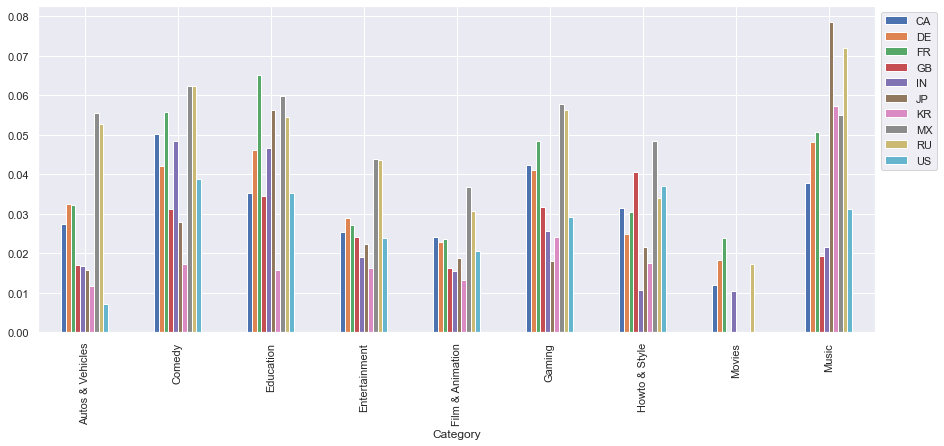

In [30]:
ax = df_agg_cc['likes / views ratio'].unstack(level=0)[:9].plot(kind='bar', 
                                                    subplots=False, figsize=(15,6))
ax.legend(bbox_to_anchor=(1.0, 1.0));

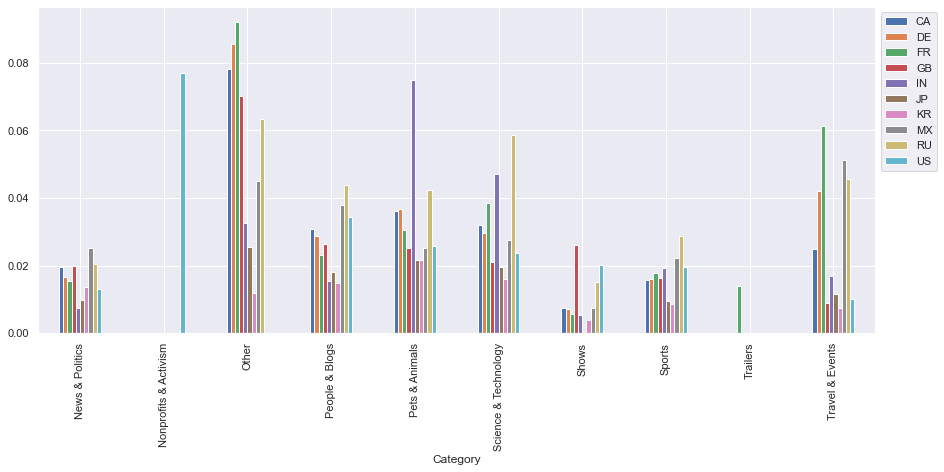

In [31]:
ax = df_agg_cc['likes / views ratio'].unstack(level=0)[9:].plot(kind='bar', 
                                                    subplots=False, figsize=(15,6))
ax.legend(bbox_to_anchor=(1.0, 1.0));

#### Dislike distribution

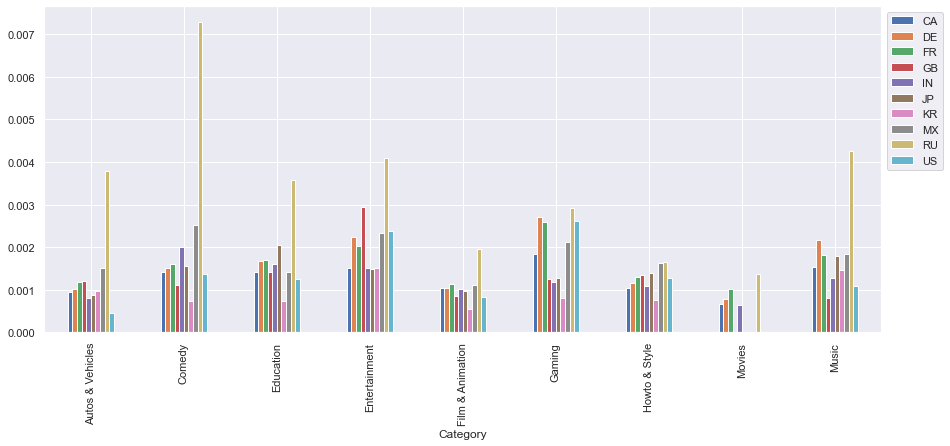

In [32]:
ax = df_agg_cc['dislikes / views ratio'].unstack(level=0)[:9].plot(kind='bar', 
                                                        subplots=False, figsize=(15,6))
ax.legend(bbox_to_anchor=(1.0, 1.0));

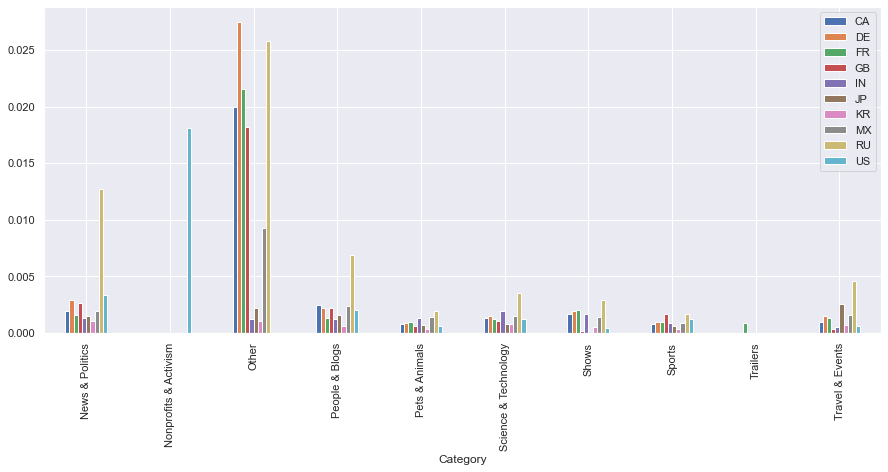

In [33]:
ax = df_agg_cc['dislikes / views ratio'].unstack(level=0)[9:].plot(kind='bar', 
                                                        subplots=False, figsize=(15,6))
ax.legend(bbox_to_anchor=(1.0, 1.0));

**Dislikes distribution shows that**:

- `Other` category has the highest dislike ratio for CA, DE, FR, GB, MX, RU.
- Russia is very involved in `News & Politics` - the dislike ratio is the 2-nd highest category.
- US has the top dislike category `Nonprofit & activism` due to the reason that US only has the trending videos in this category.
- It seems that Russia is the country with the highest dislike ratio. RU has the most disliked among other countries in categories: `Autos & Vehicles`, `Comedy`, `Education`, `Entertainment`, `Film & Animation`, `Music`, `News & Politics`, `Other`, etc.

## Is it easier for musicians to collect likes than for politicians?

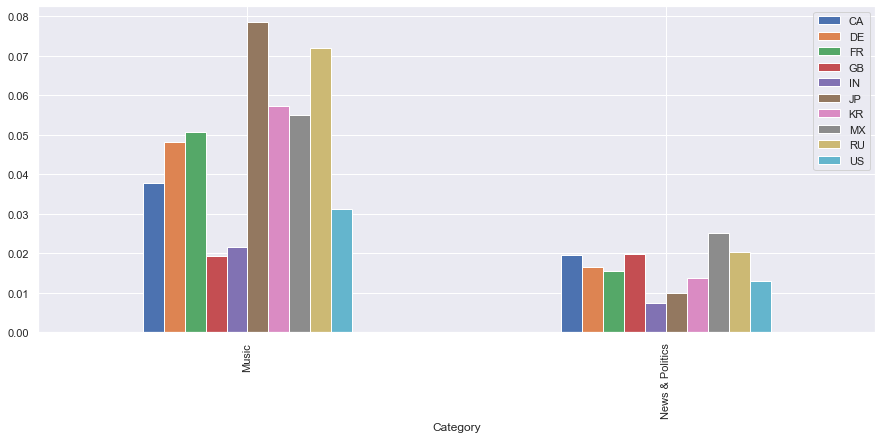

In [34]:
ax = df_agg_cc[np.in1d(df_agg_cc.index.get_level_values(1), 
    ['Music', 'News & Politics'])]['likes / views ratio'].unstack(level=0)[:9].plot(kind='bar',
                                                                subplots=False, figsize=(15,6))
ax.legend(bbox_to_anchor=(1.0, 1.0));

**Answer**

**Yes, it is easier for musicians to collect likes than for politicians. `Music` category has more likes than `News & Politics` for all countries except Great Britain where `Music` and `News & Politics` category have a very close number of likes.**

## 3) Сhannels that are popular in most countries. Ed Sheeran, hello.

### Сhannels that are popular in total

In [35]:
df_agg_pop = df.groupby(by='channel_title').sum()
df_agg_pop = df_agg_pop.drop(['category_id', 'comments_disabled', 'ratings_disabled',
                            'video_error_or_removed'], axis=1)
df_agg_pop.sort_values(by='views', ascending=False).head(10)

,views,likes,dislikes,comment_count,count
channel_title,,,,,
ibighit,1923972104,188457821,2997881,30629100,344
Marvel Entertainment,1566262238,45321488,987955,5340058,506
T-Series,1194758852,21056711,1390703,1468918,391
YouTube Spotlight,1070604343,25402136,13408953,7184705,89
Dude Perfect,1066522084,39745942,834088,2886336,371
PewDiePie,1034084934,77685067,2096710,9035295,663
Ed Sheeran,961761004,35670792,643599,1774448,204
ChildishGambinoVEVO,884940487,25140340,1394992,2616769,95
TaylorSwiftVEVO,882715953,34134261,1848016,2936033,193


**Answer**

**`Ed Sheeran` with 962 million trending views at 7-the position, whereas `ibighit` has 1.9 billion.**

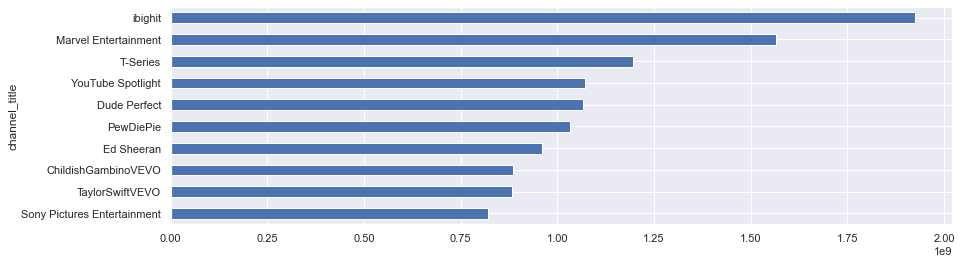

In [36]:
ax = df_agg_pop.sort_values(by='views', ascending=False)['views'][:10][::-1].plot(kind='barh',
                                                        subplots=False, figsize=(14,4));

**If popularity measure by other metrics, picture will be different. For example, `by likes` Ed Sheeran at 6-th place.**

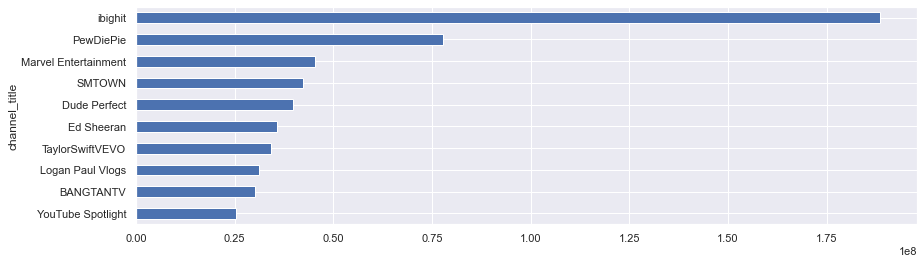

In [37]:
ax = df_agg_pop.sort_values(by='likes', ascending=False)['likes'][:10][::-1].plot(kind='barh',
                                                        subplots=False, figsize=(14,4));

**The `Likes + dislike` measure provides similar results.**

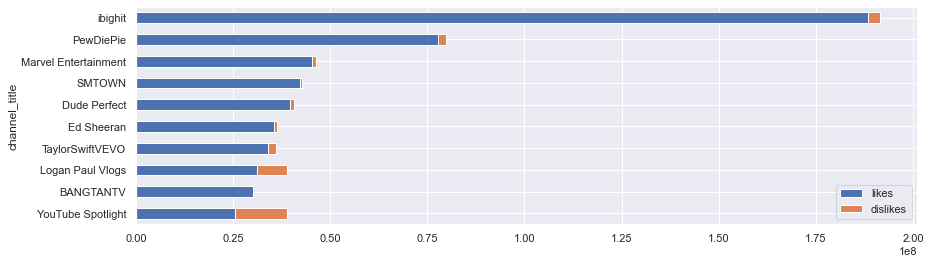

In [38]:
ax = df_agg_pop.sort_values(by='likes', ascending=False)[['likes', 'dislikes']][:10][::-1].plot(kind='barh',
                                                        subplots=False, figsize=(14,4), stacked=True);

**By `comment_count` he is at 26-th place.**

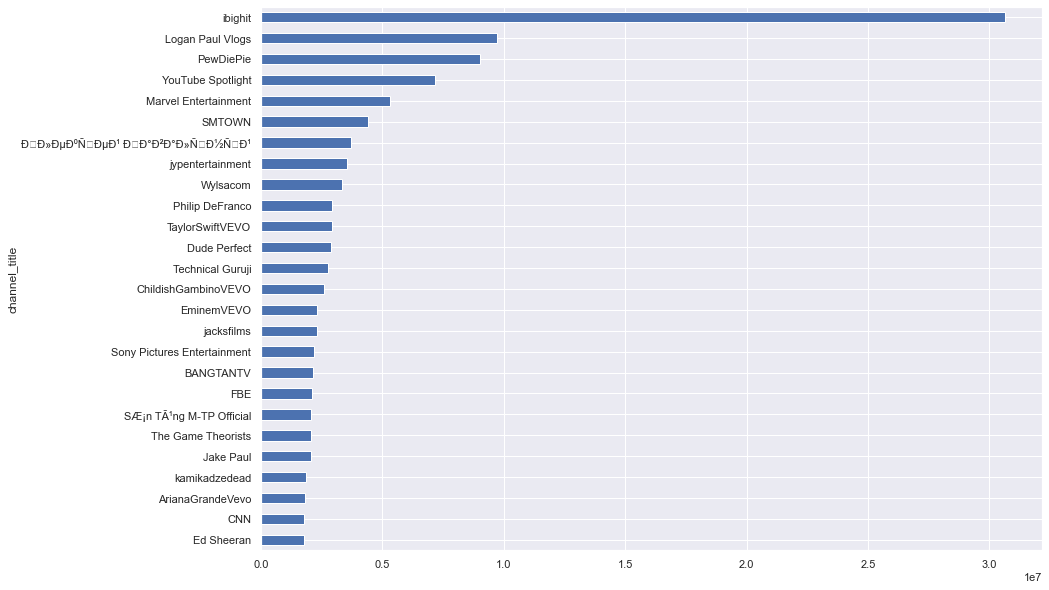

In [39]:
ax = df_agg_pop.sort_values(by='comment_count', 
                ascending=False)['comment_count'][:26][::-1].plot(kind='barh',
                                                    subplots=False, figsize=(14,10));

**This notebook is also avalable by the link**: https://github.com/alex-kalinichenko/misc/blob/master/youtube_trending/youtube_trending_2.ipynb